# Importing libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img
import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from keras.layers import LeakyReLU

# Import dataset và thực hiện chuẩn hóa

In [35]:
train_path = 'Dataset/train/train'
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 4,
                                   width_shift_range=0.15,
                                   height_shift_range = 0.2,
                                   shear_range=0.3,
                                   fill_mode='nearest',
                                   validation_split=0.25)

train_set = train_datagen.flow_from_directory(directory=train_path, class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(64,64), batch_size=128, shuffle=True,
                                                    subset ="training")

validation_set = train_datagen.flow_from_directory(directory=train_path,
                                                 target_size = (64,64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',subset="validation",shuffle=True)

Found 13500 images belonging to 20 classes.
Found 4500 images belonging to 20 classes.


In [36]:
print(train_set.class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19}


# Xây dựng mô hình

In [37]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32,input_shape=(64,64,1),kernel_size=(3,3),strides=(1,1),activation='relu'))
    
    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.15))
    

    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))

    model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(20,activation='softmax'))
 
    
    model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['accuracy']
                )
    return model 

In [38]:
model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 128)         73856     
                                                      

# Training the model

In [39]:
h = model.fit(
      train_set,validation_data = validation_set,
                              epochs=20,steps_per_epoch = 64,validation_steps = 48,
                              callbacks = [
                              keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='auto'),
                              keras.callbacks.ModelCheckpoint('explo/model_{val_loss:.3f}.h5',
                              save_best_only = True,save_weights_only=False,
                              monitor='val_loss')
                              ]


)


Epoch 1/20
64/64 [==============================] - 13s 193ms/step - loss: 2.5381 - accuracy: 0.2027 - val_loss: 1.3371 - val_accuracy: 0.5573
Epoch 2/20


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 11s 171ms/step - loss: 0.7801 - accuracy: 0.7349 - val_loss: 0.3379 - val_accuracy: 0.8822
Epoch 3/20
64/64 [==============================] - 14s 212ms/step - loss: 0.2592 - accuracy: 0.9136 - val_loss: 0.1721 - val_accuracy: 0.9453
Epoch 4/20
64/64 [==============================] - 13s 201ms/step - loss: 0.1674 - accuracy: 0.9450 - val_loss: 0.1289 - val_accuracy: 0.9652
Epoch 5/20
64/64 [==============================] - 13s 200ms/step - loss: 0.1055 - accuracy: 0.9631 - val_loss: 0.0833 - val_accuracy: 0.9688
Epoch 6/20
64/64 [==============================] - 14s 216ms/step - loss: 0.0708 - accuracy: 0.9764 - val_loss: 0.0776 - val_accuracy: 0.9743
Epoch 7/20
64/64 [==============================] - 20s 317ms/step - loss: 0.0687 - accuracy: 0.9769 - val_loss: 0.0545 - val_accuracy: 0.9831
Epoch 8/20
64/64 [==============================] - 17s 263ms/step - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.0936 - val_accuracy: 0.9714
Epoch 9/20

In [40]:
## Loading the saved model
from keras.models import load_model
model = load_model('model3.h5')

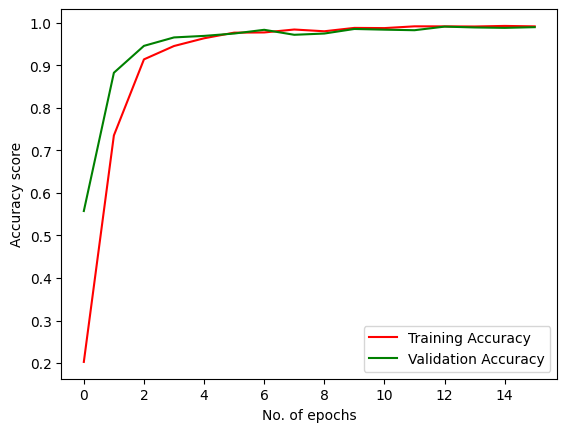

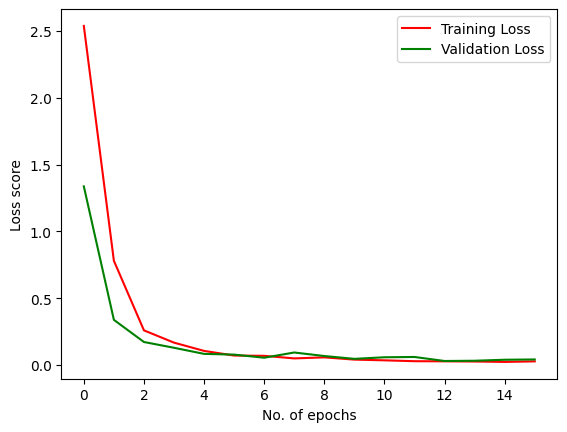

In [41]:
%matplotlib inline
accu= h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Validation Accuracy')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy score')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Validation Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss score')
plt.legend()
plt.show()
		


In [42]:
test_path = "Dataset/test/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(directory=test_path, class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(64,64), batch_size=128, shuffle=False)


Found 6000 images belonging to 20 classes.


In [43]:
test_evaluation_result = model.evaluate(test_set)

47/47 [==============================] - 6s 119ms/step - loss: 3.3551e-04 - accuracy: 1.0000


In [44]:
print("Test Loss:", test_evaluation_result[0])
print("Test Accuracy:", test_evaluation_result[1])

Test Loss: 0.0003355050866957754
Test Accuracy: 1.0
